In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

#### Import data

In [2]:
phys_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_U.nc')
phys_gridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_V.nc')
phys_gridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_T.nc')
# test_run_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_U.nc')


#Import mesh
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

(300.0, 500.0)

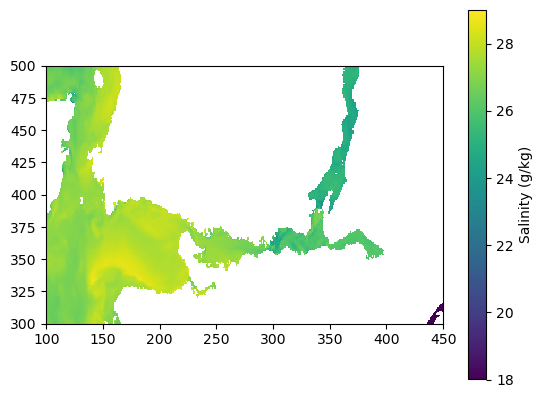

In [ ]:
masked_sal = np.ma.masked_array(phys_gridT.vosaline[23, 3], mask=tmask[0])

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,vmin=18,vmax=29)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('Salinity (g/kg)')
ax.set_xlim(100,450)
ax.set_ylim(300,500)

(300.0, 500.0)

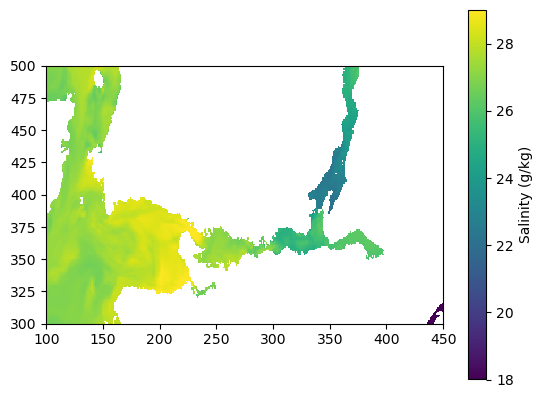

In [4]:
masked_sal = np.ma.masked_array(phys_gridT.vosaline[0, 3], mask=tmask[0])

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,vmin=18,vmax=29)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('Salinity (g/kg)')
ax.set_xlim(100,450)
ax.set_ylim(300,500)

(300.0, 500.0)

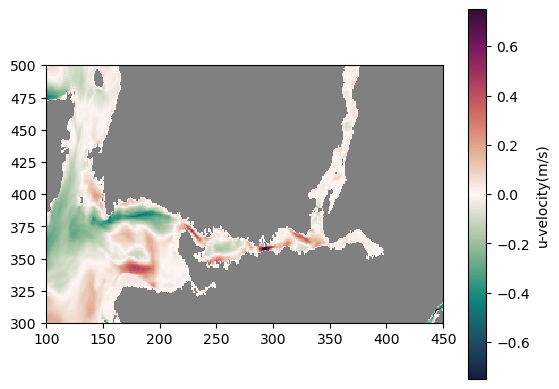

In [5]:
masked_uvel = np.ma.masked_array(phys_gridU.vozocrtx[0, 3], mask=tmask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_uvel,vmin=-0.75,vmax=0.75,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax.set_xlim(100,450)
ax.set_ylim(300,500)

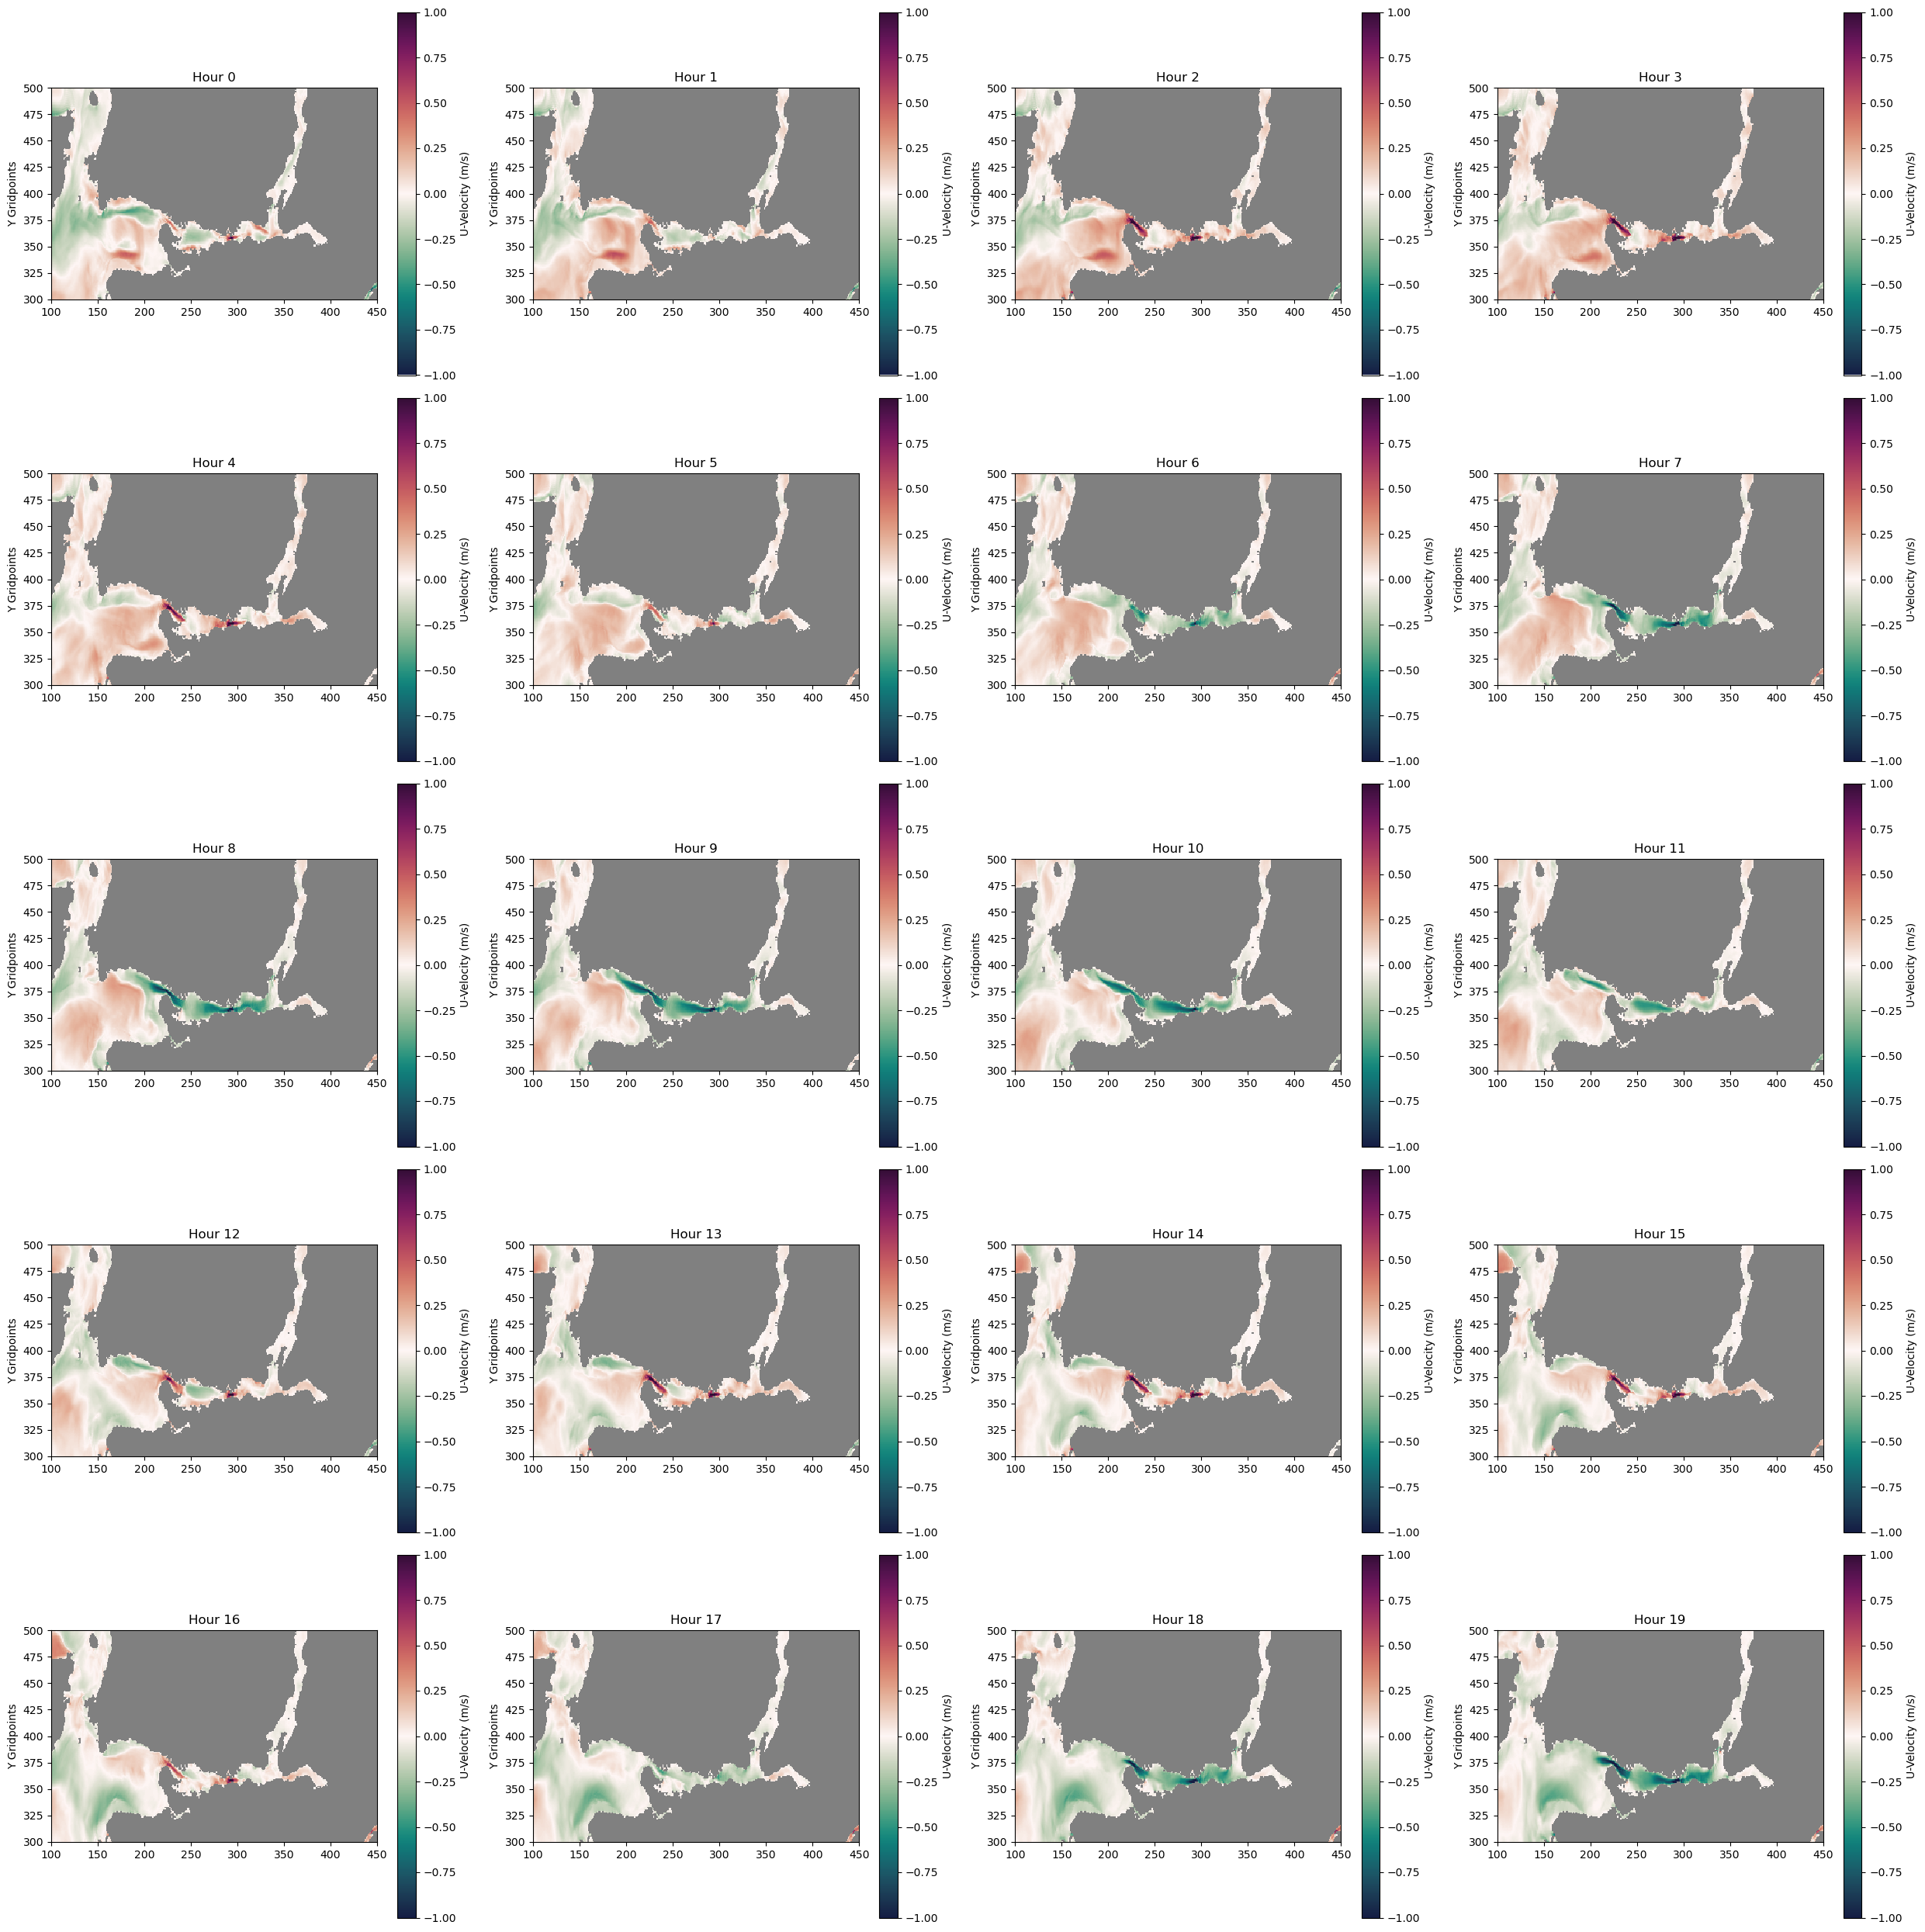

In [6]:
#Plot daily tide cycle surface - Feb23

nrows = 5
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.curl
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = np.ma.masked_array(phys_gridU.vozocrtx[i*ncols+j, 0], mask=umask[0])
        ax[i,j].pcolormesh(vfull,vmin=-1,vmax=1)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=-1,vmax=1)
        ax[i,j].set_ylim([300,500])
        ax[i,j].set_xlim([100,450])
        cb = fig.colorbar(colours, ax=ax[i,j])
        cb.set_label('U-Velocity (m/s)')
        viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()


Text(0, 0.5, 'Depth (m)')

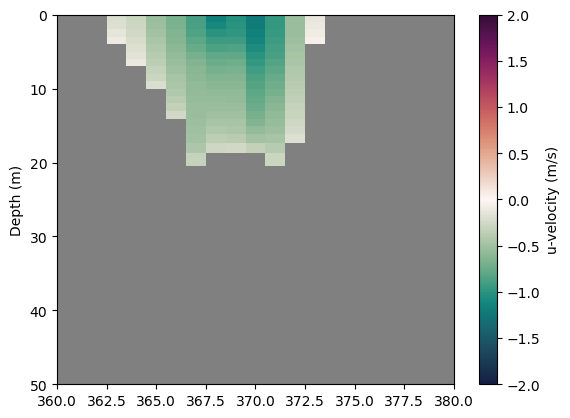

In [9]:
lonset = 230
uvel = np.ma.masked_array(phys_gridU.vozocrtx[21, :,:, lonset], mask=umask[:, :, lonset])

fig,ax = plt.subplots()
colours = ax.pcolormesh(phys_gridU.y, phys_gridU.depthu, uvel, cmap=cmap, vmax=2.0, vmin=-2.0)
ax.set_xlim(360, 380)
ax.set_ylim(0,50)
ax.invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('u-velocity (m/s)');
# viz_tools.set_aspect(ax[1]);
ax.set_ylabel('Depth (m)')

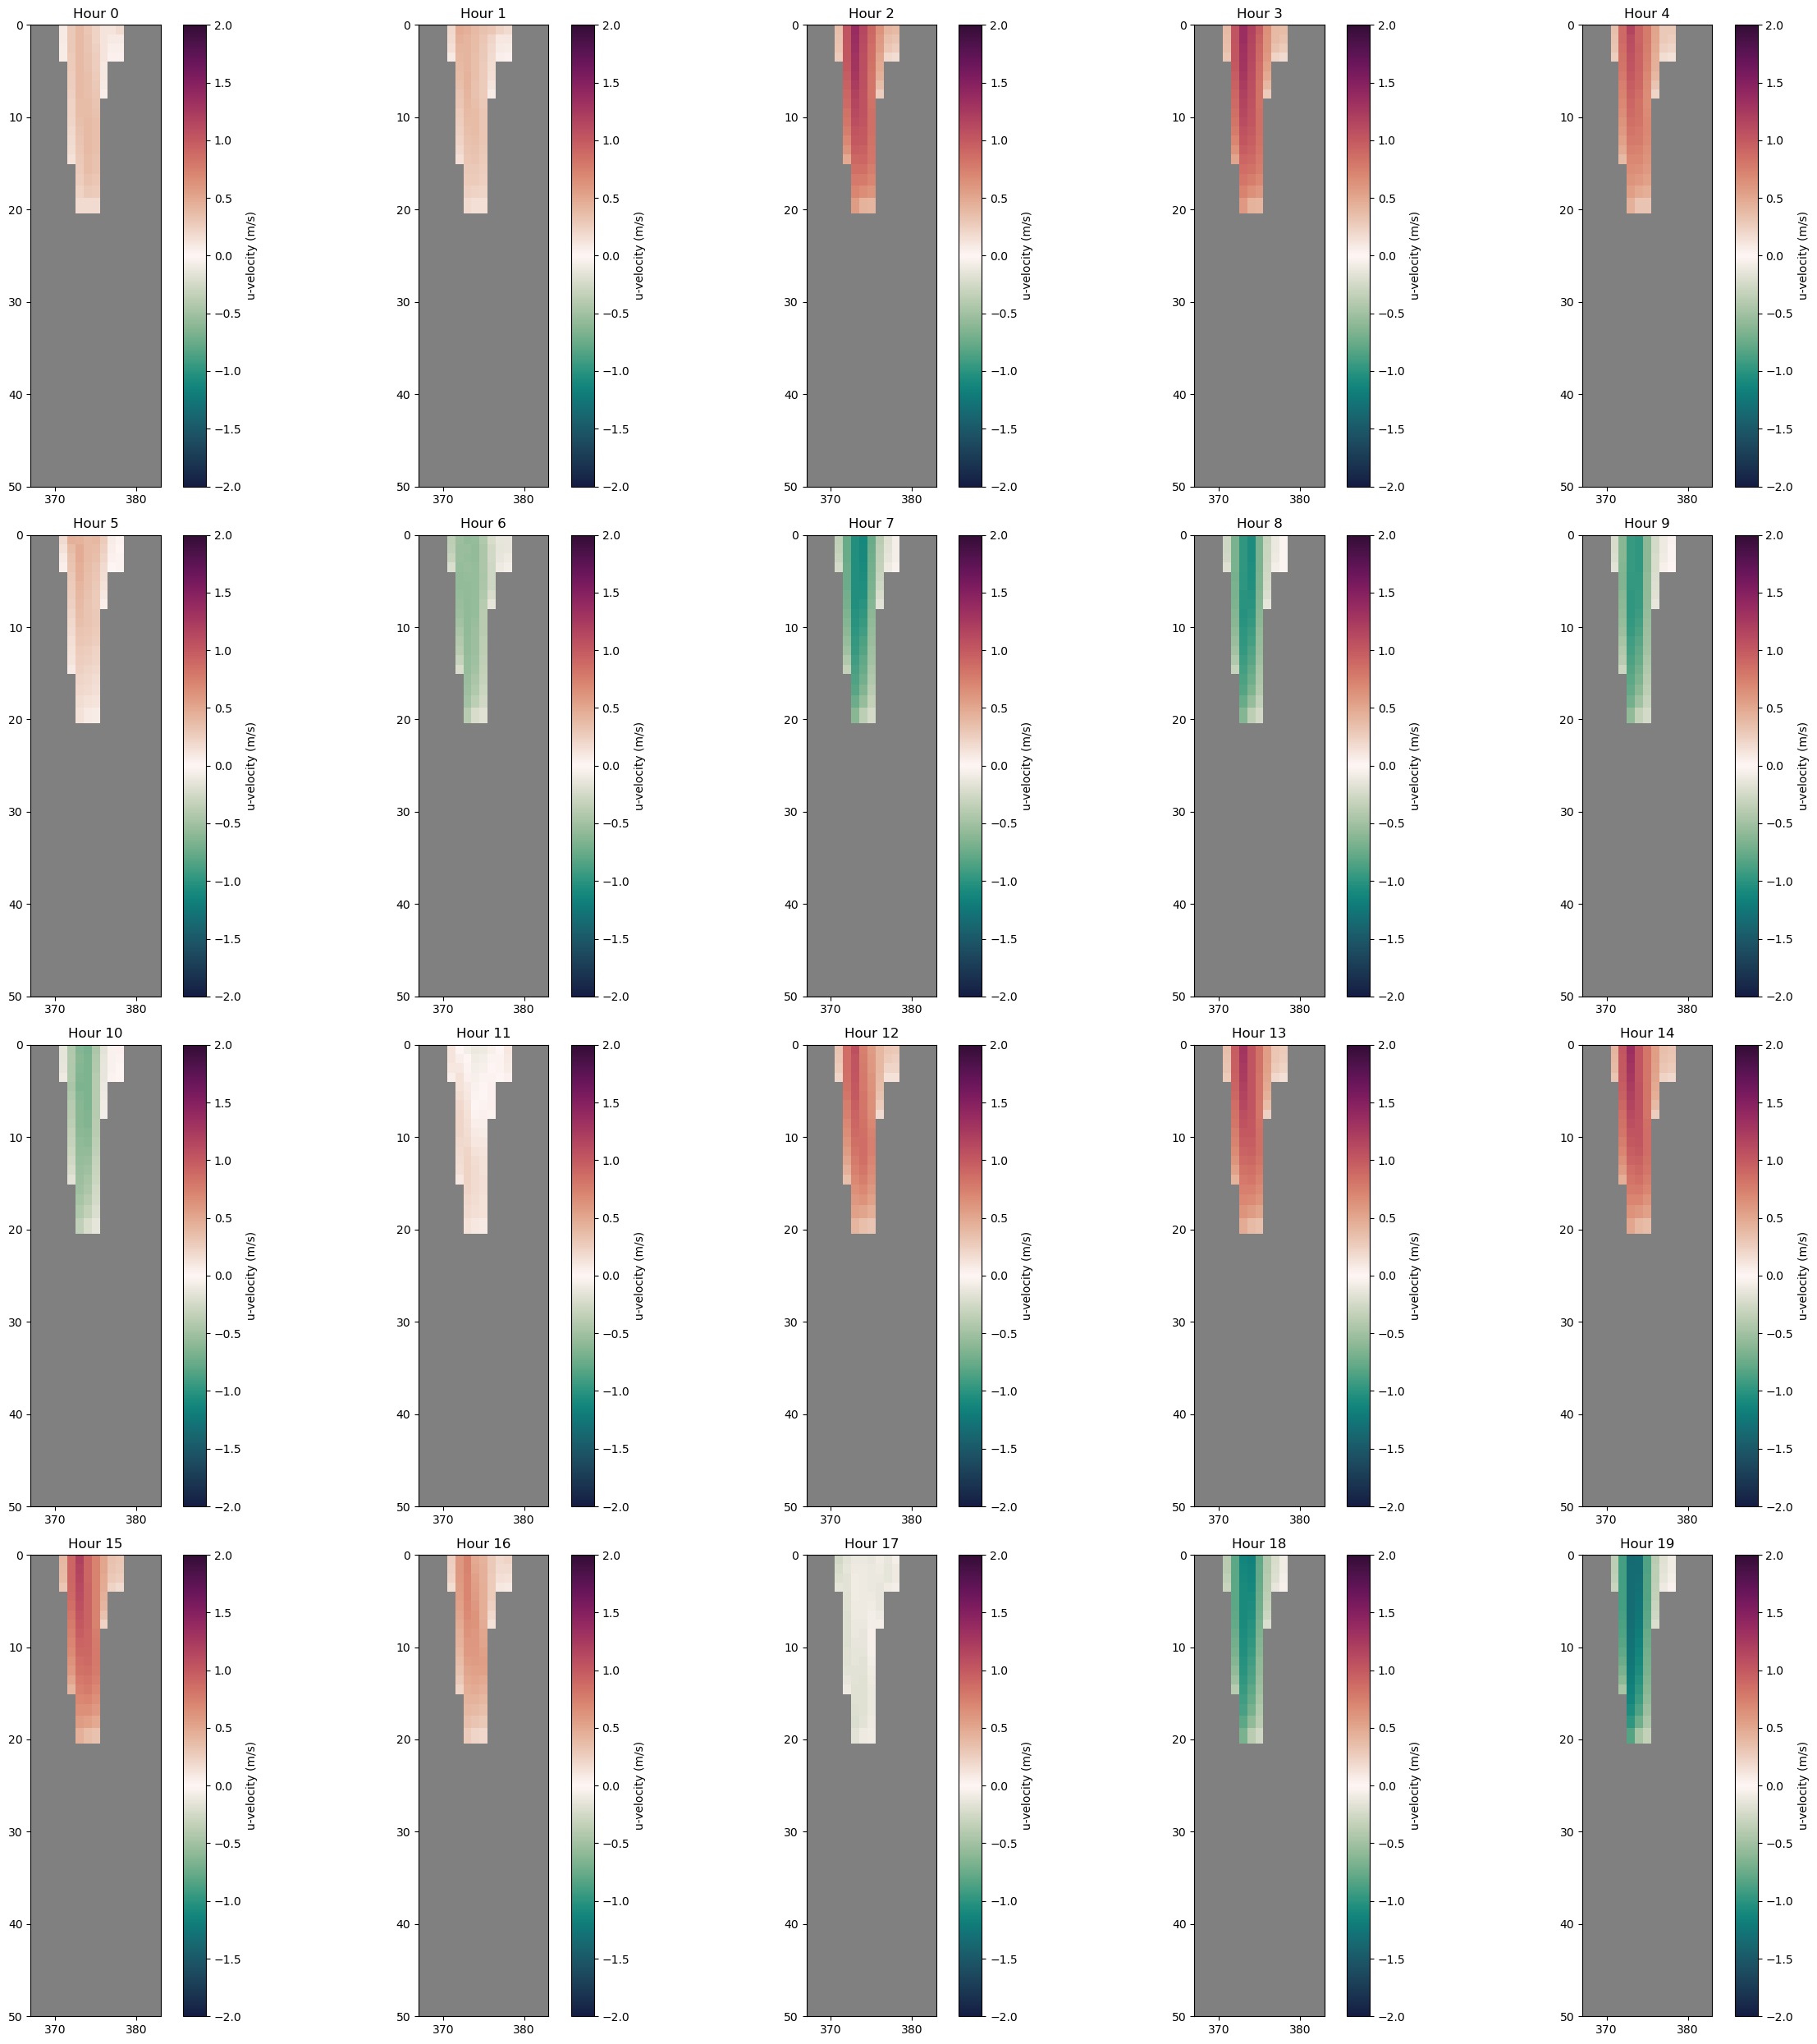

In [10]:
#Plot daily tide cycle in First Narrows - Feb23

nrows = 4
ncols = 5
lonset = 225
fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.curl
cmap.set_bad('gray')

for i in range(nrows):
    for j in range(ncols):
        uvel = np.ma.masked_array(phys_gridU.vozocrtx[i*ncols+j, :,:, lonset], mask=umask[:, :, lonset])
        colours = ax[i,j].pcolormesh(phys_gridU.y, phys_gridU.depthu, uvel, cmap=cmap, vmax=2.0, vmin=-2.0)
        ax[i,j].set_xlim(367, 383)
        ax[i,j].set_ylim(0,50)
        ax[i,j].invert_yaxis();
        cb = fig.colorbar(colours, ax=ax[i,j])
        cb.set_label('u-velocity (m/s)');
        ax[i,j].pcolormesh(vfull,vmin=-1,vmax=1)
        viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()


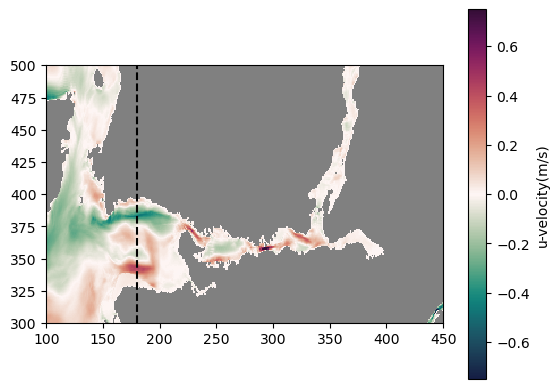

In [11]:
masked_uvel = np.ma.masked_array(phys_gridU.vozocrtx[0, 3], mask=tmask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_uvel,vmin=-0.75,vmax=0.75,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax.set_xlim(100,450)
ax.set_ylim(300,500)
ax.axvline(180,color='k',ls='--')

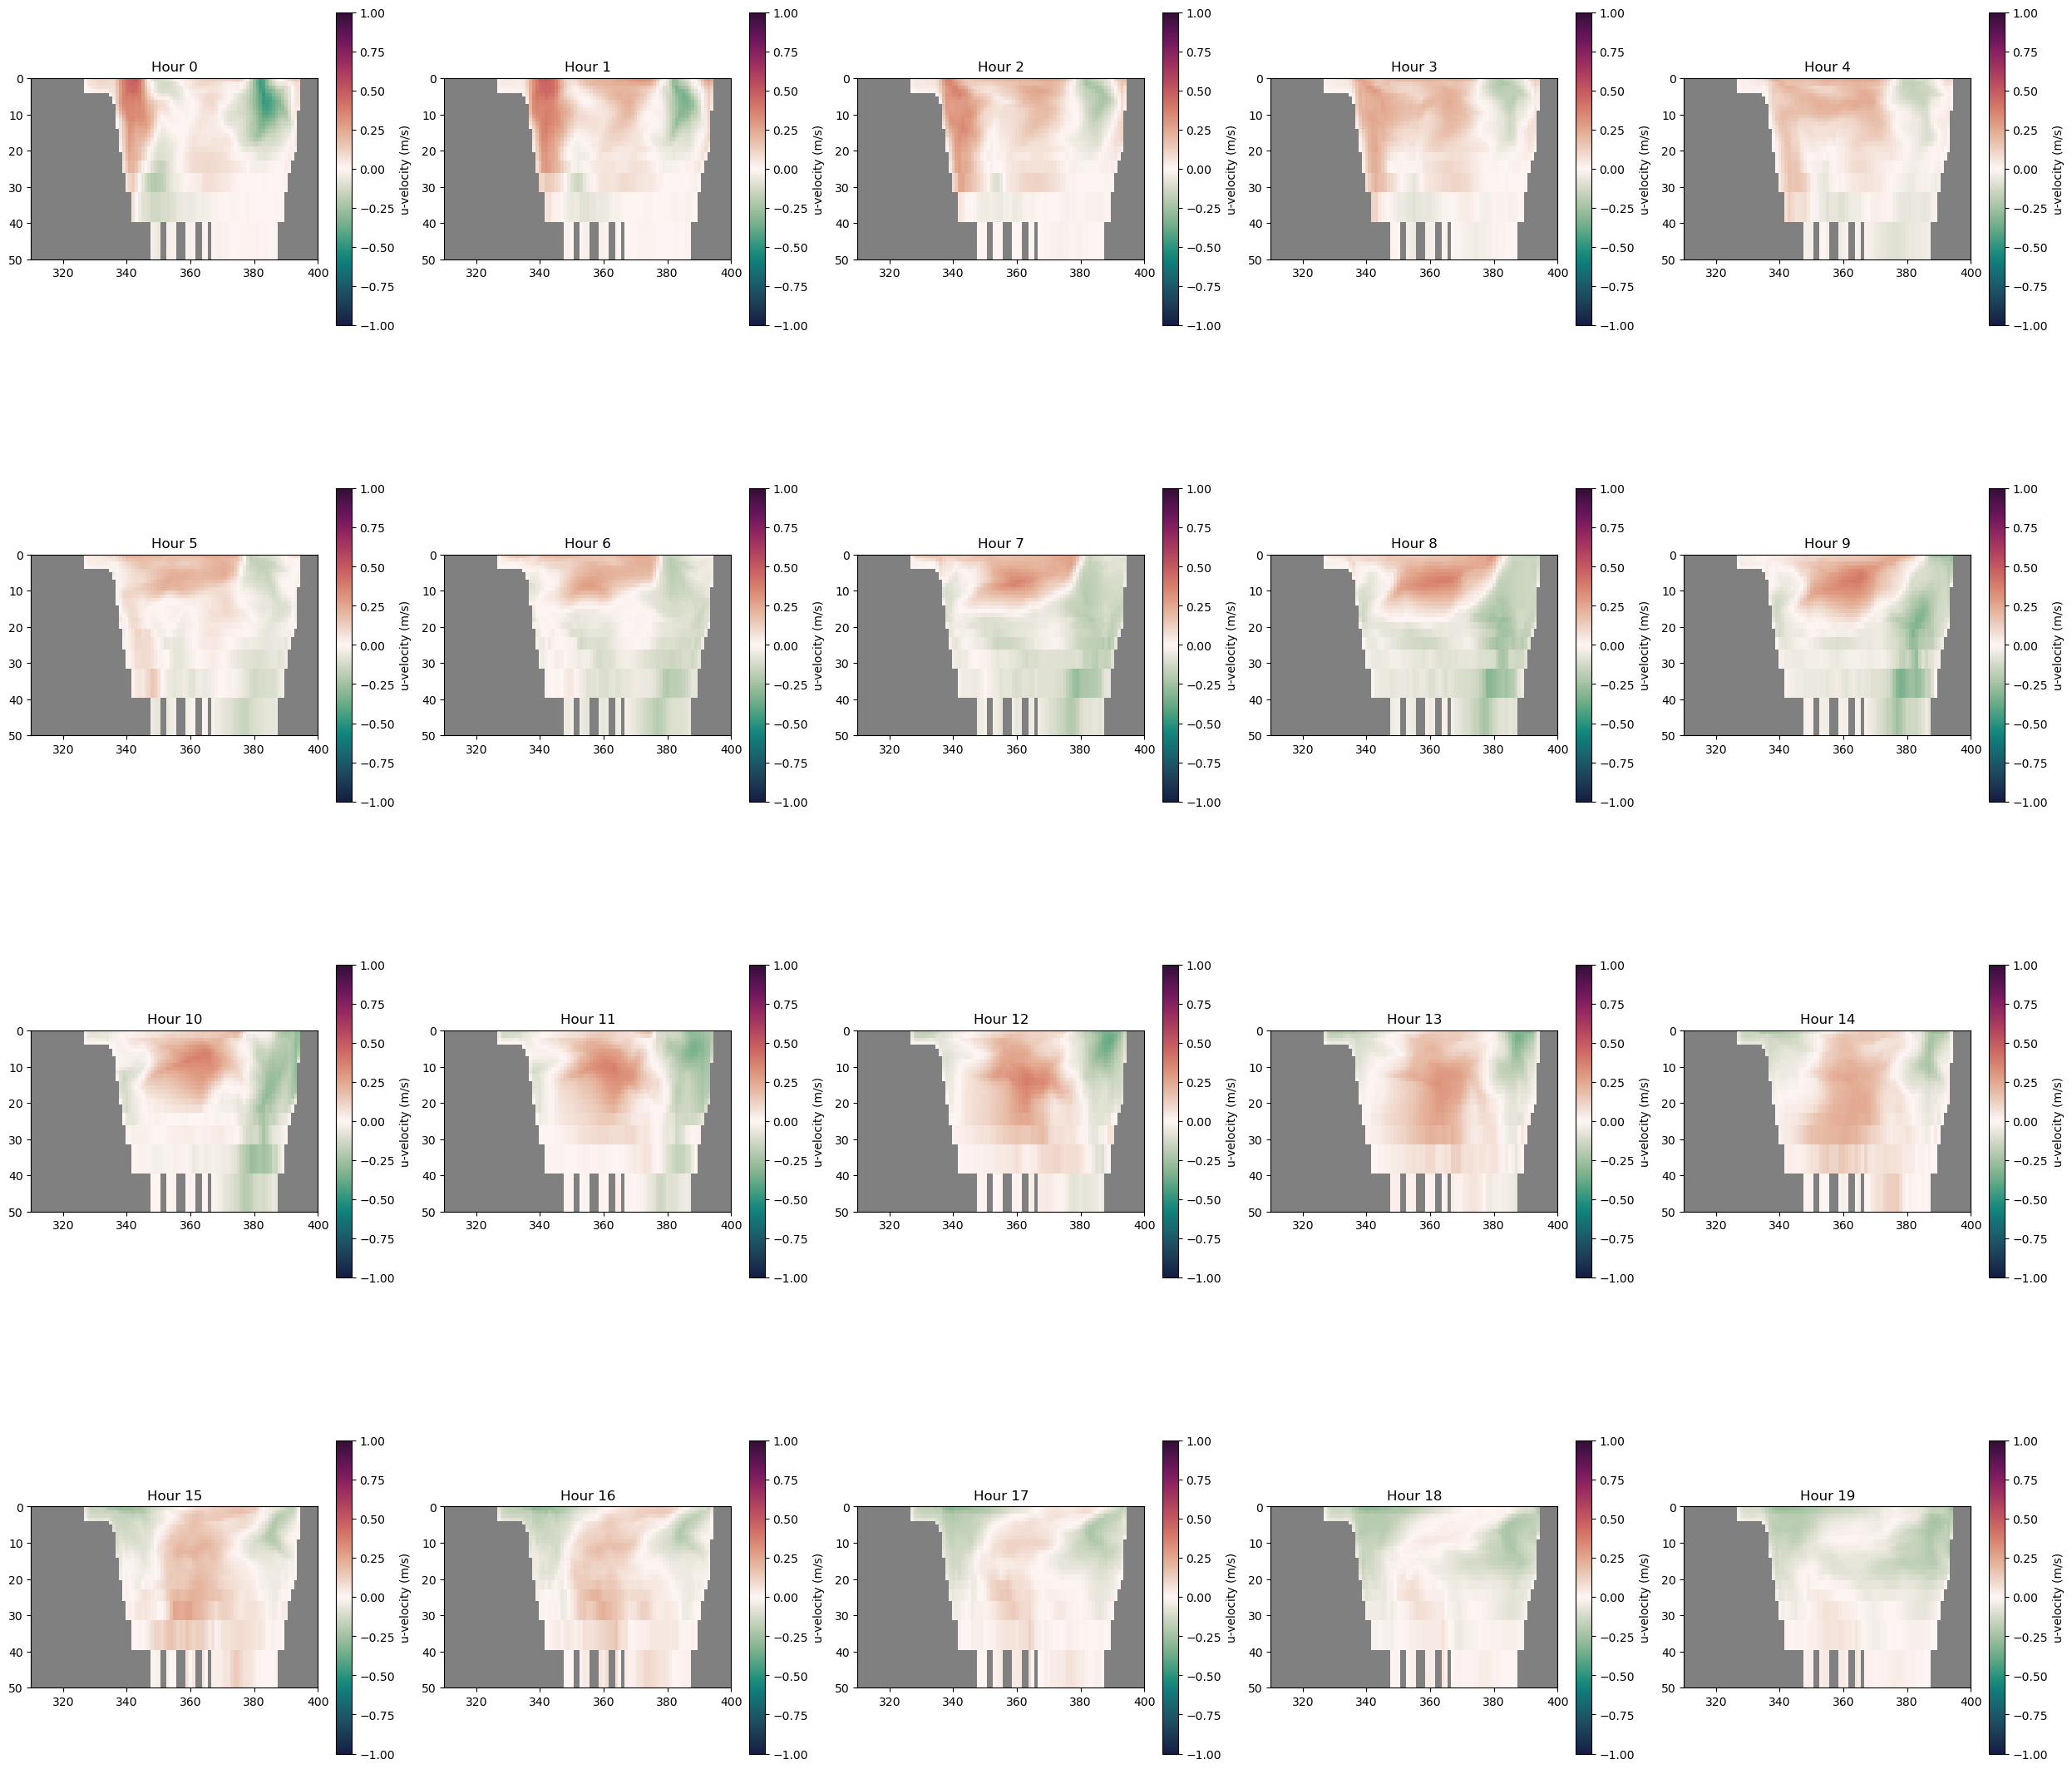

In [12]:

#Plot daily tide cycle - Feb23

nrows = 4
ncols = 5
lonset = 180
fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.curl
cmap.set_bad('gray')

for i in range(nrows):
    for j in range(ncols):
        uvel = np.ma.masked_array(phys_gridU.vozocrtx[i*ncols+j, :,:, lonset], mask=umask[:, :, lonset])
        colours = ax[i,j].pcolormesh(phys_gridU.y, phys_gridU.depthu, uvel, cmap=cmap, vmax=1, vmin=-1.0)
        ax[i,j].set_xlim(310, 400)
        ax[i,j].set_ylim(0,50)
        ax[i,j].invert_yaxis();
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.5)
        cb.set_label('u-velocity (m/s)');
        ax[i,j].pcolormesh(vfull,vmin=-1,vmax=1)
        viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()


### V-velocity

Text(0.5, 0.98, 'V-velocity')

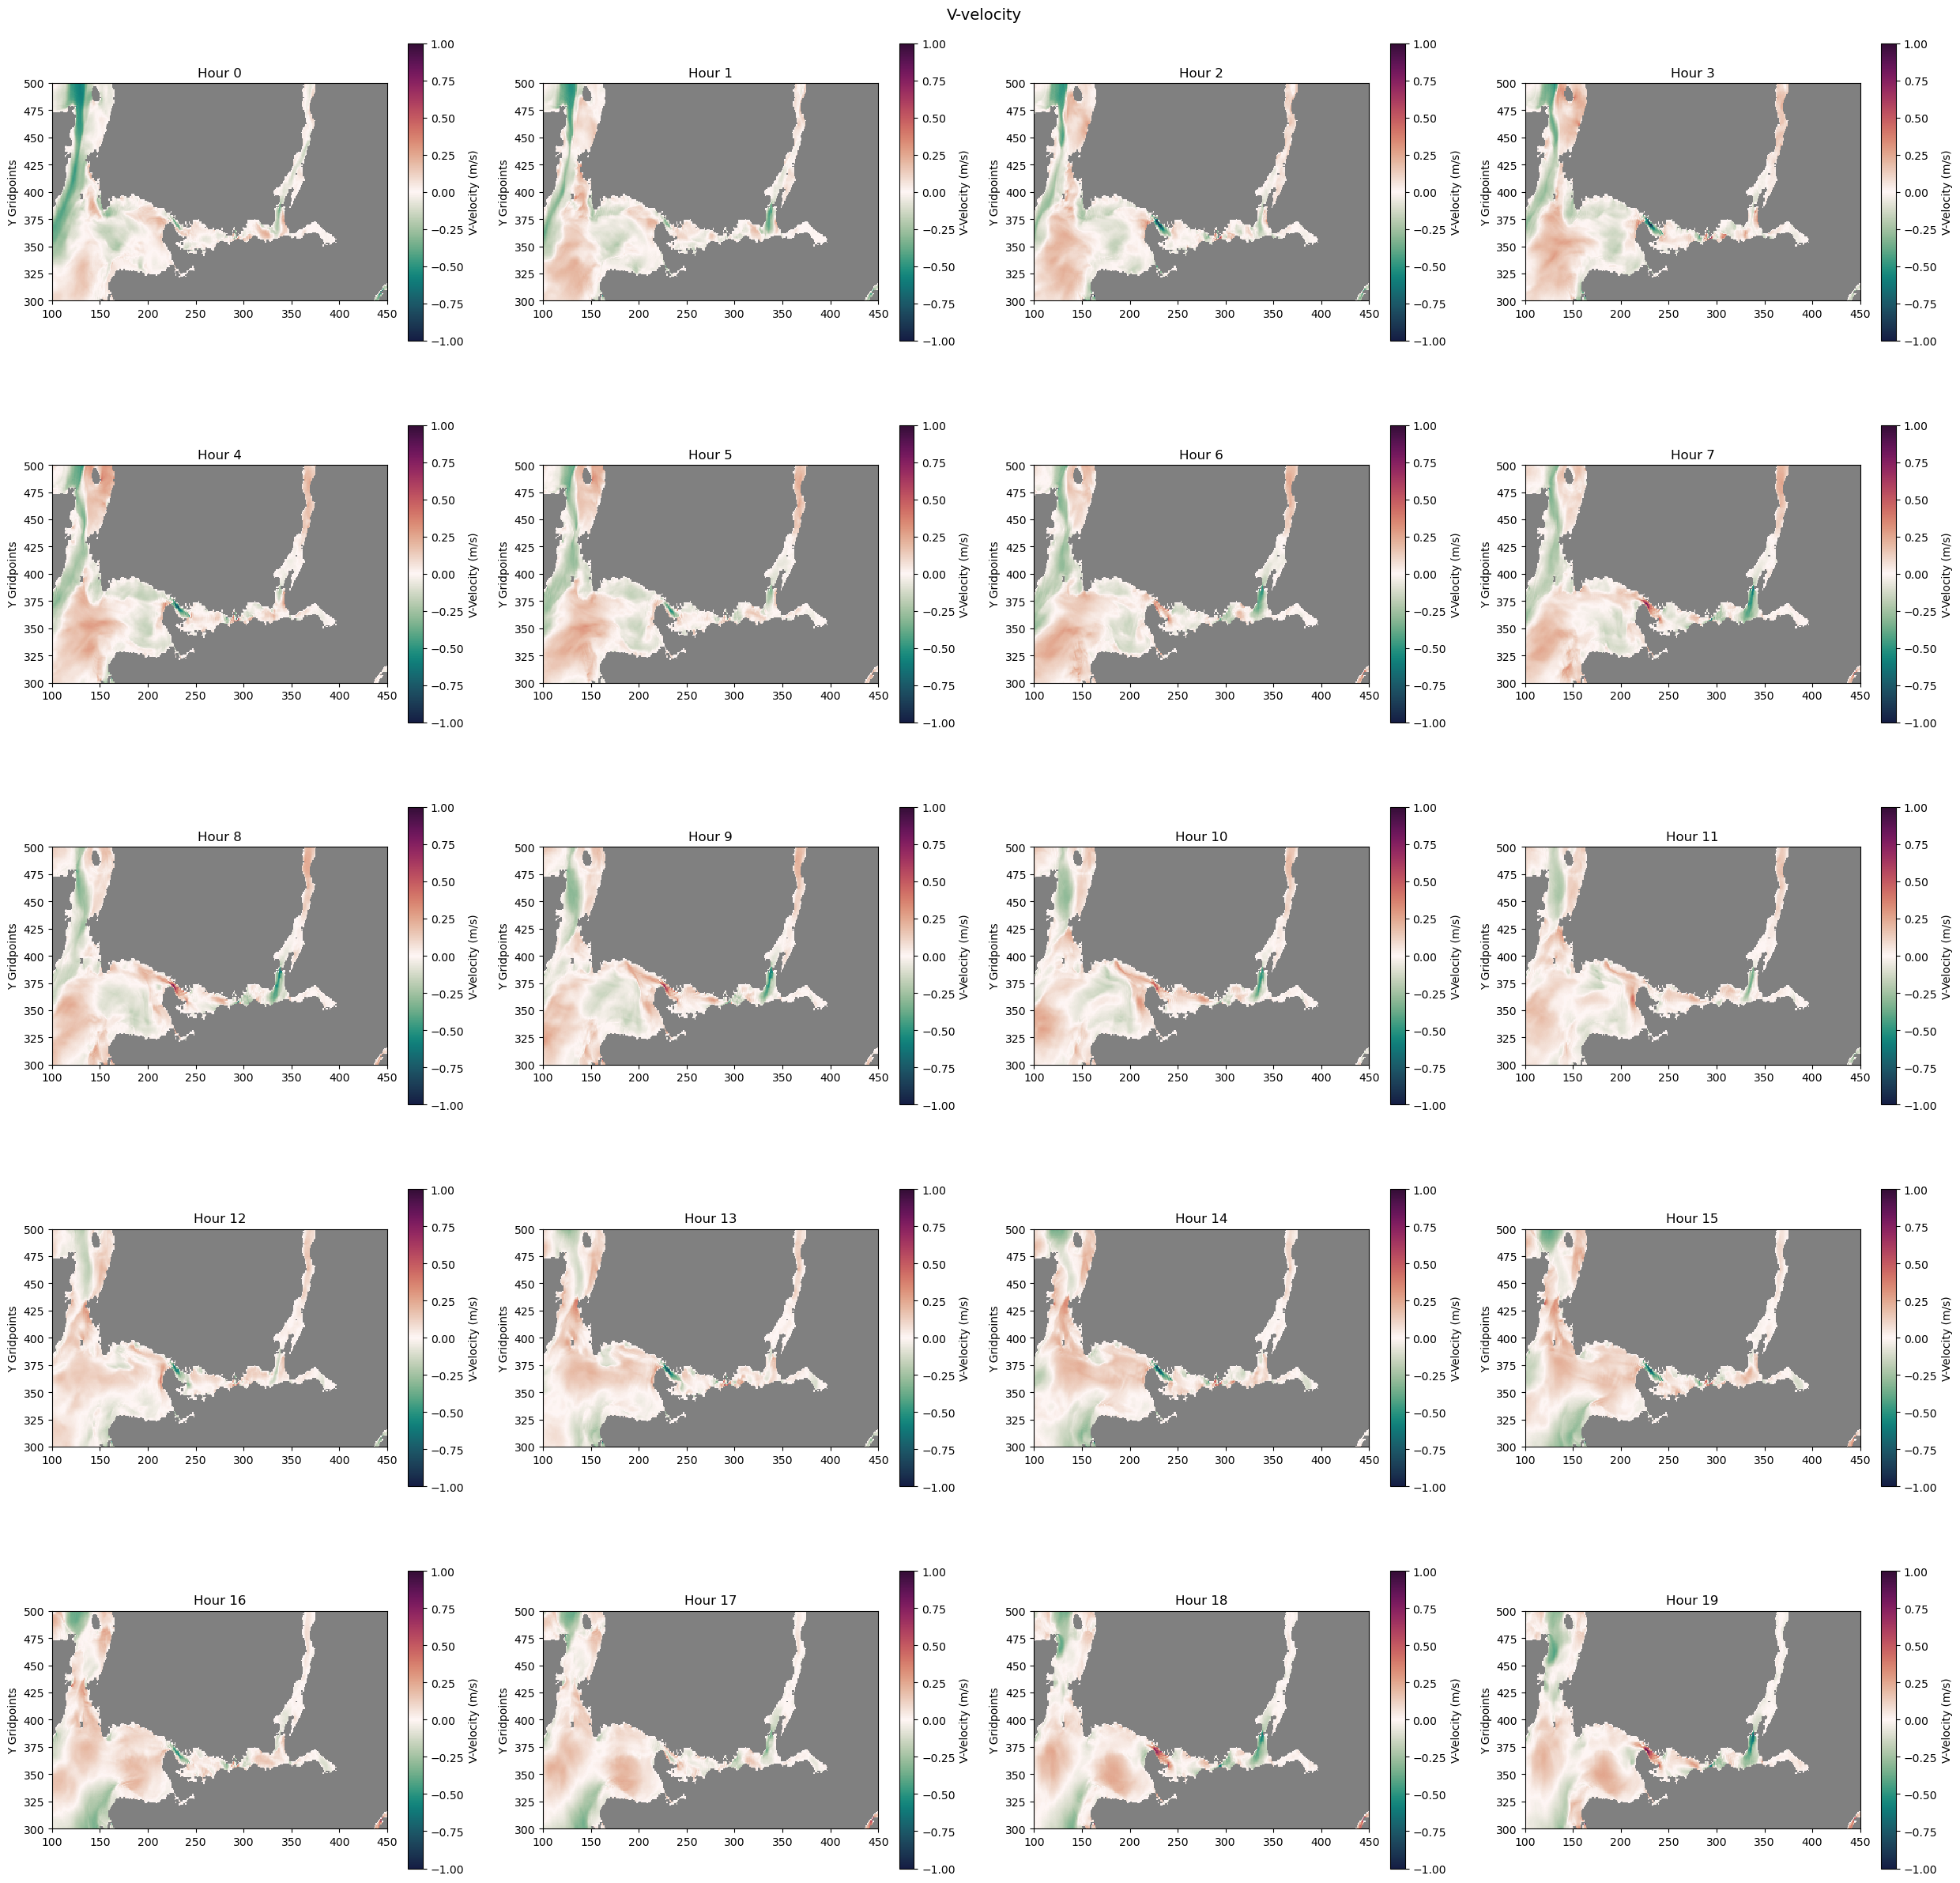

In [13]:
#Plot daily tide cycle surface - Feb23

nrows = 5
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.curl
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = np.ma.masked_array(phys_gridV.vomecrty[i*ncols+j, 0], mask=umask[0])
        ax[i,j].pcolormesh(vfull,vmin=-1,vmax=1)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=-1,vmax=1)
        ax[i,j].set_ylim([300,500])
        ax[i,j].set_xlim([100,450])
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.7)
        cb.set_label('V-Velocity (m/s)')
        viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()
fig.suptitle('V-velocity',fontsize=14)
